#                                 Linear Regression Assignment
## Bike Shared Data Set

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

        - Which variables are significant in predicting the demand for shared bikes.
        - How well those variables describe the bike demands
 


## Will Follows these step to build multiple linear regression model
    Step 1- Import all Required packages
    Step 2- Data Loading/Reading, Understanding and visualising the Data(EDA)
    Step 3- Prepare Data for Modeling (train-test split and rescaling)
    Step 4- Building the model
    Step 5- Residual Analysis
    Step 6- Prediction and evaluation on the test set


## Step 1- Import all Required packages


In [1]:
# Importing required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm

## Step 2- Data Loading/Reading, Understanding and visualising the Data(EDA)

In [2]:
# Loading/Reading the bike sharing data set

bikesharing_data= pd.read_csv("D:\\Linear Regression\\Assignment\\day.csv")


In [3]:
# checking the first 5 rows of the loaded data set

bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the last 5 rows data loaded correctly or not


bikesharing_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Checking All row and columns are loaded or not

bikesharing_data.shape

(730, 16)

In [6]:
# Checking Missing Values counts 

bikesharing_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# checking the Data type of all columns

bikesharing_data.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking the detailed information of all variable

bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Understanding Data:<br>
    1. Data have 730 rows and 16 Columns
    2. Data do not have null values
    

### Data Cleansing

In [9]:
# Droping date dteday,casual,registerd column as we have yr and month coulmn and date column not required
# Casual and Register are number are already into CNT column
# Instant is index column which is not required for LM

bikesharing_data.drop(['instant','dteday','casual','registered'], inplace=True, axis=1)

In [10]:
# Checking All row and columns after droping dteday column

bikesharing_data.shape

(730, 12)

In [11]:
bikesharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
# Converting season numeric value into categorical value

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bikesharing_data['season'] = bikesharing_data['season'].map(season_mapping)

bikesharing_data.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [13]:
# Converting month numeric value into categorical value

month_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikesharing_data['mnth'] = bikesharing_data['mnth'].map(month_mapping)

bikesharing_data.mnth.value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [14]:
# Converting weekdays numeric value into categorical value

weekday_mapping = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
bikesharing_data['weekday'] = bikesharing_data['weekday'].map(weekday_mapping)

bikesharing_data.weekday.value_counts()

Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64

In [15]:
# Converting weathersit numeric value into categorical value

weathersit_mapping = {1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'}
bikesharing_data['weathersit'] = bikesharing_data['weathersit'].map(weathersit_mapping)

bikesharing_data.weathersit.value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [16]:
# checking data if all mapping updated

bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization

In [17]:
bikesharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

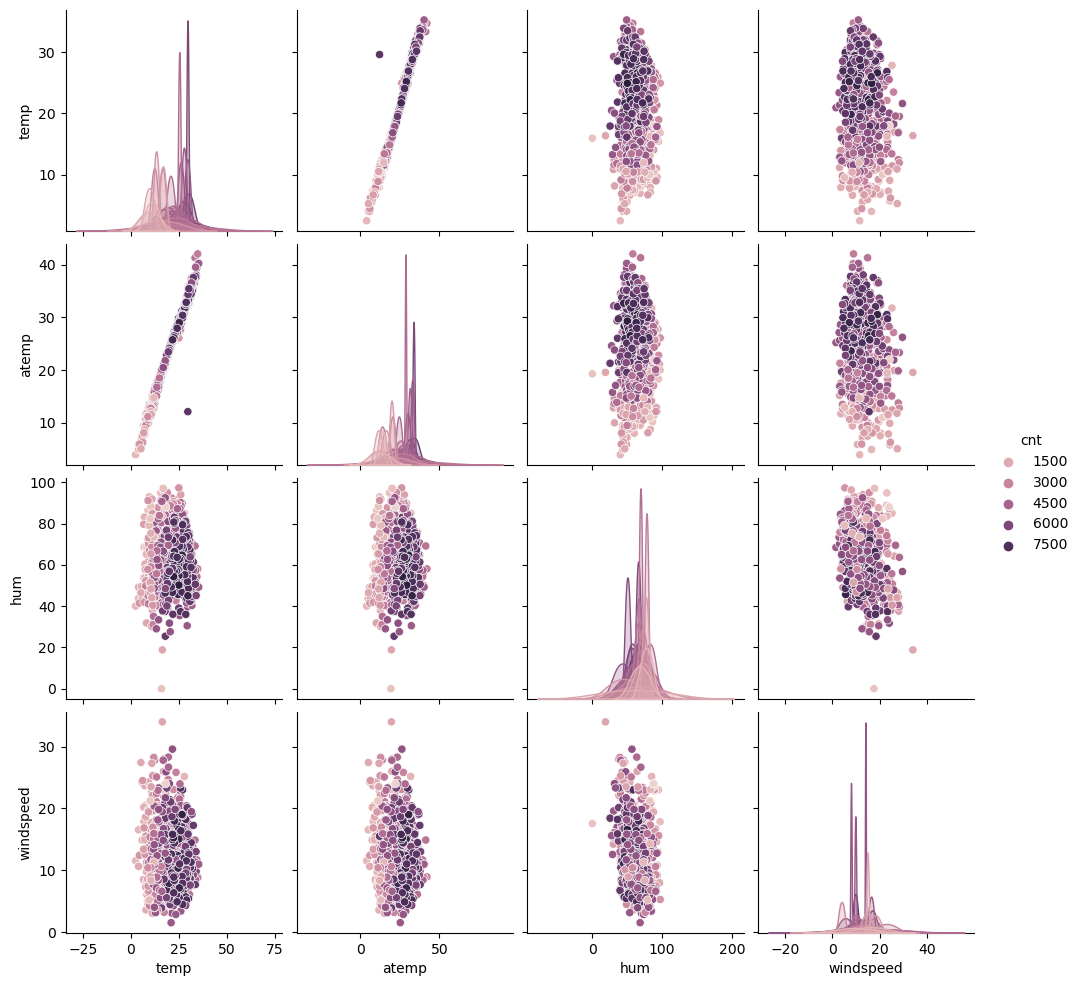

In [18]:
# Ploting the pairplot of numeric variable

sns.pairplot(data=bikesharing_data, vars = ["temp","atemp","hum","windspeed"],hue='cnt')
plt.show()


#### Ploting the Boxplot to analyze categorical variable

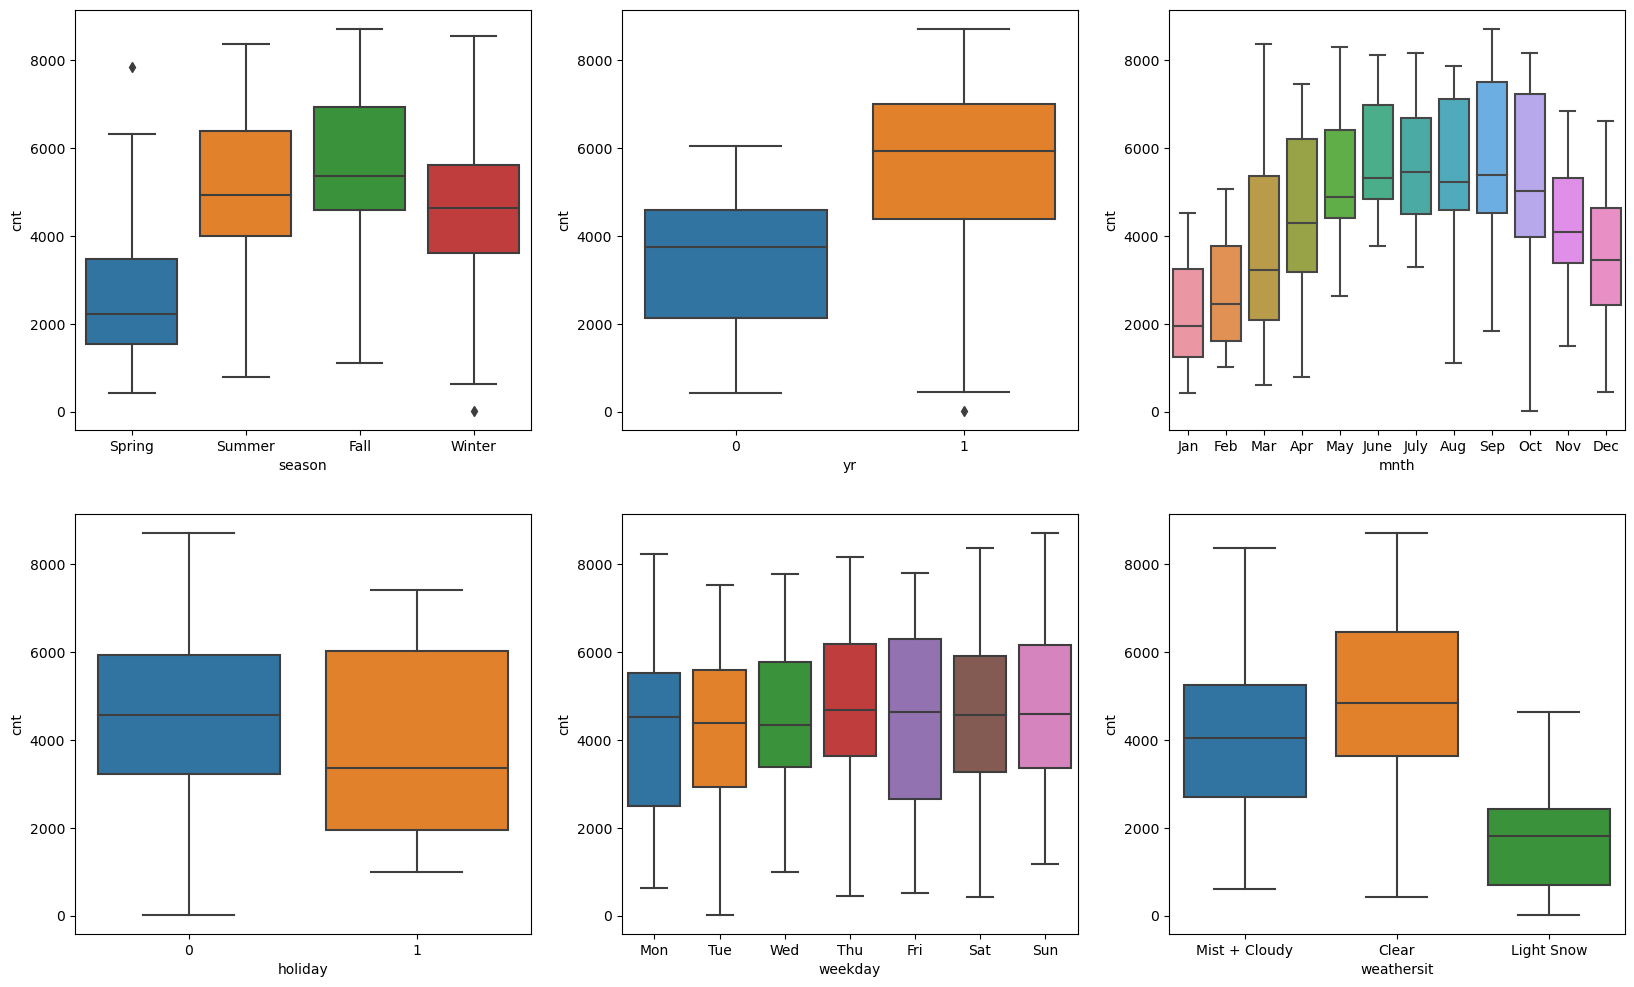

In [19]:
# Ploting the Boxplot of Categorical variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_data)
plt.show()


### Output:
    1. Numaric variable 
        - pairplot shows high co-relation between temp and atemp
    2. Categorical Variable 
        - Season -> Fall have highest count booking wherein booking in spring season have low
        - Year   -> Compare to previous year 2019 bikes demand are high
        - Month  -> Sep and Oct have higest booking comare to other month
        - Holiday-> Considering 0 is non holiday booking bike booking are high on non holiday
        - Weekday-> As per the box plot almost booking is same for all day
        - Weathersit -> Booking are high on clear and mist weather compare to Light Snow

## Step 3- Prepare Data for Modeling (train-test split and rescaling)
## Data Preparation
### Creating Dummy Variable

In [20]:
# Checking Columns

bikesharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
# Creating dummy variables for the all 4 categorical feature columns which is haveing morethan 2 atribute and storing it in a same variable - 'bikesharing_data'

bikesharing_data = pd.get_dummies(data=bikesharing_data,columns=['season', 'mnth', 'weekday','weathersit'],drop_first=True)



In [22]:
# Checking dataframe
bikesharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Checking columns
bikesharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

### Splitting the Data into Training and Testing Sets

In [24]:
# Splitting the data into Trainig and Test sets

df_train, df_test = train_test_split(bikesharing_data, train_size = 0.7, random_state = 100)

In [25]:
# Chacking Shape of the split train and test dataset

print('df_train-> ',df_train.shape)
print('df_test-> ',df_test.shape)

df_train->  (510, 30)
df_test->  (220, 30)


### Rescaling the Features using MinMax scaling


In [26]:
# Creating a Scaler object

scaler = MinMaxScaler()


In [27]:
# Applying scaler to all the below columns

num_vars = ['cnt','hum','windspeed','temp','atemp']

# Fiting on Data
            
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
# Checking the data quality
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


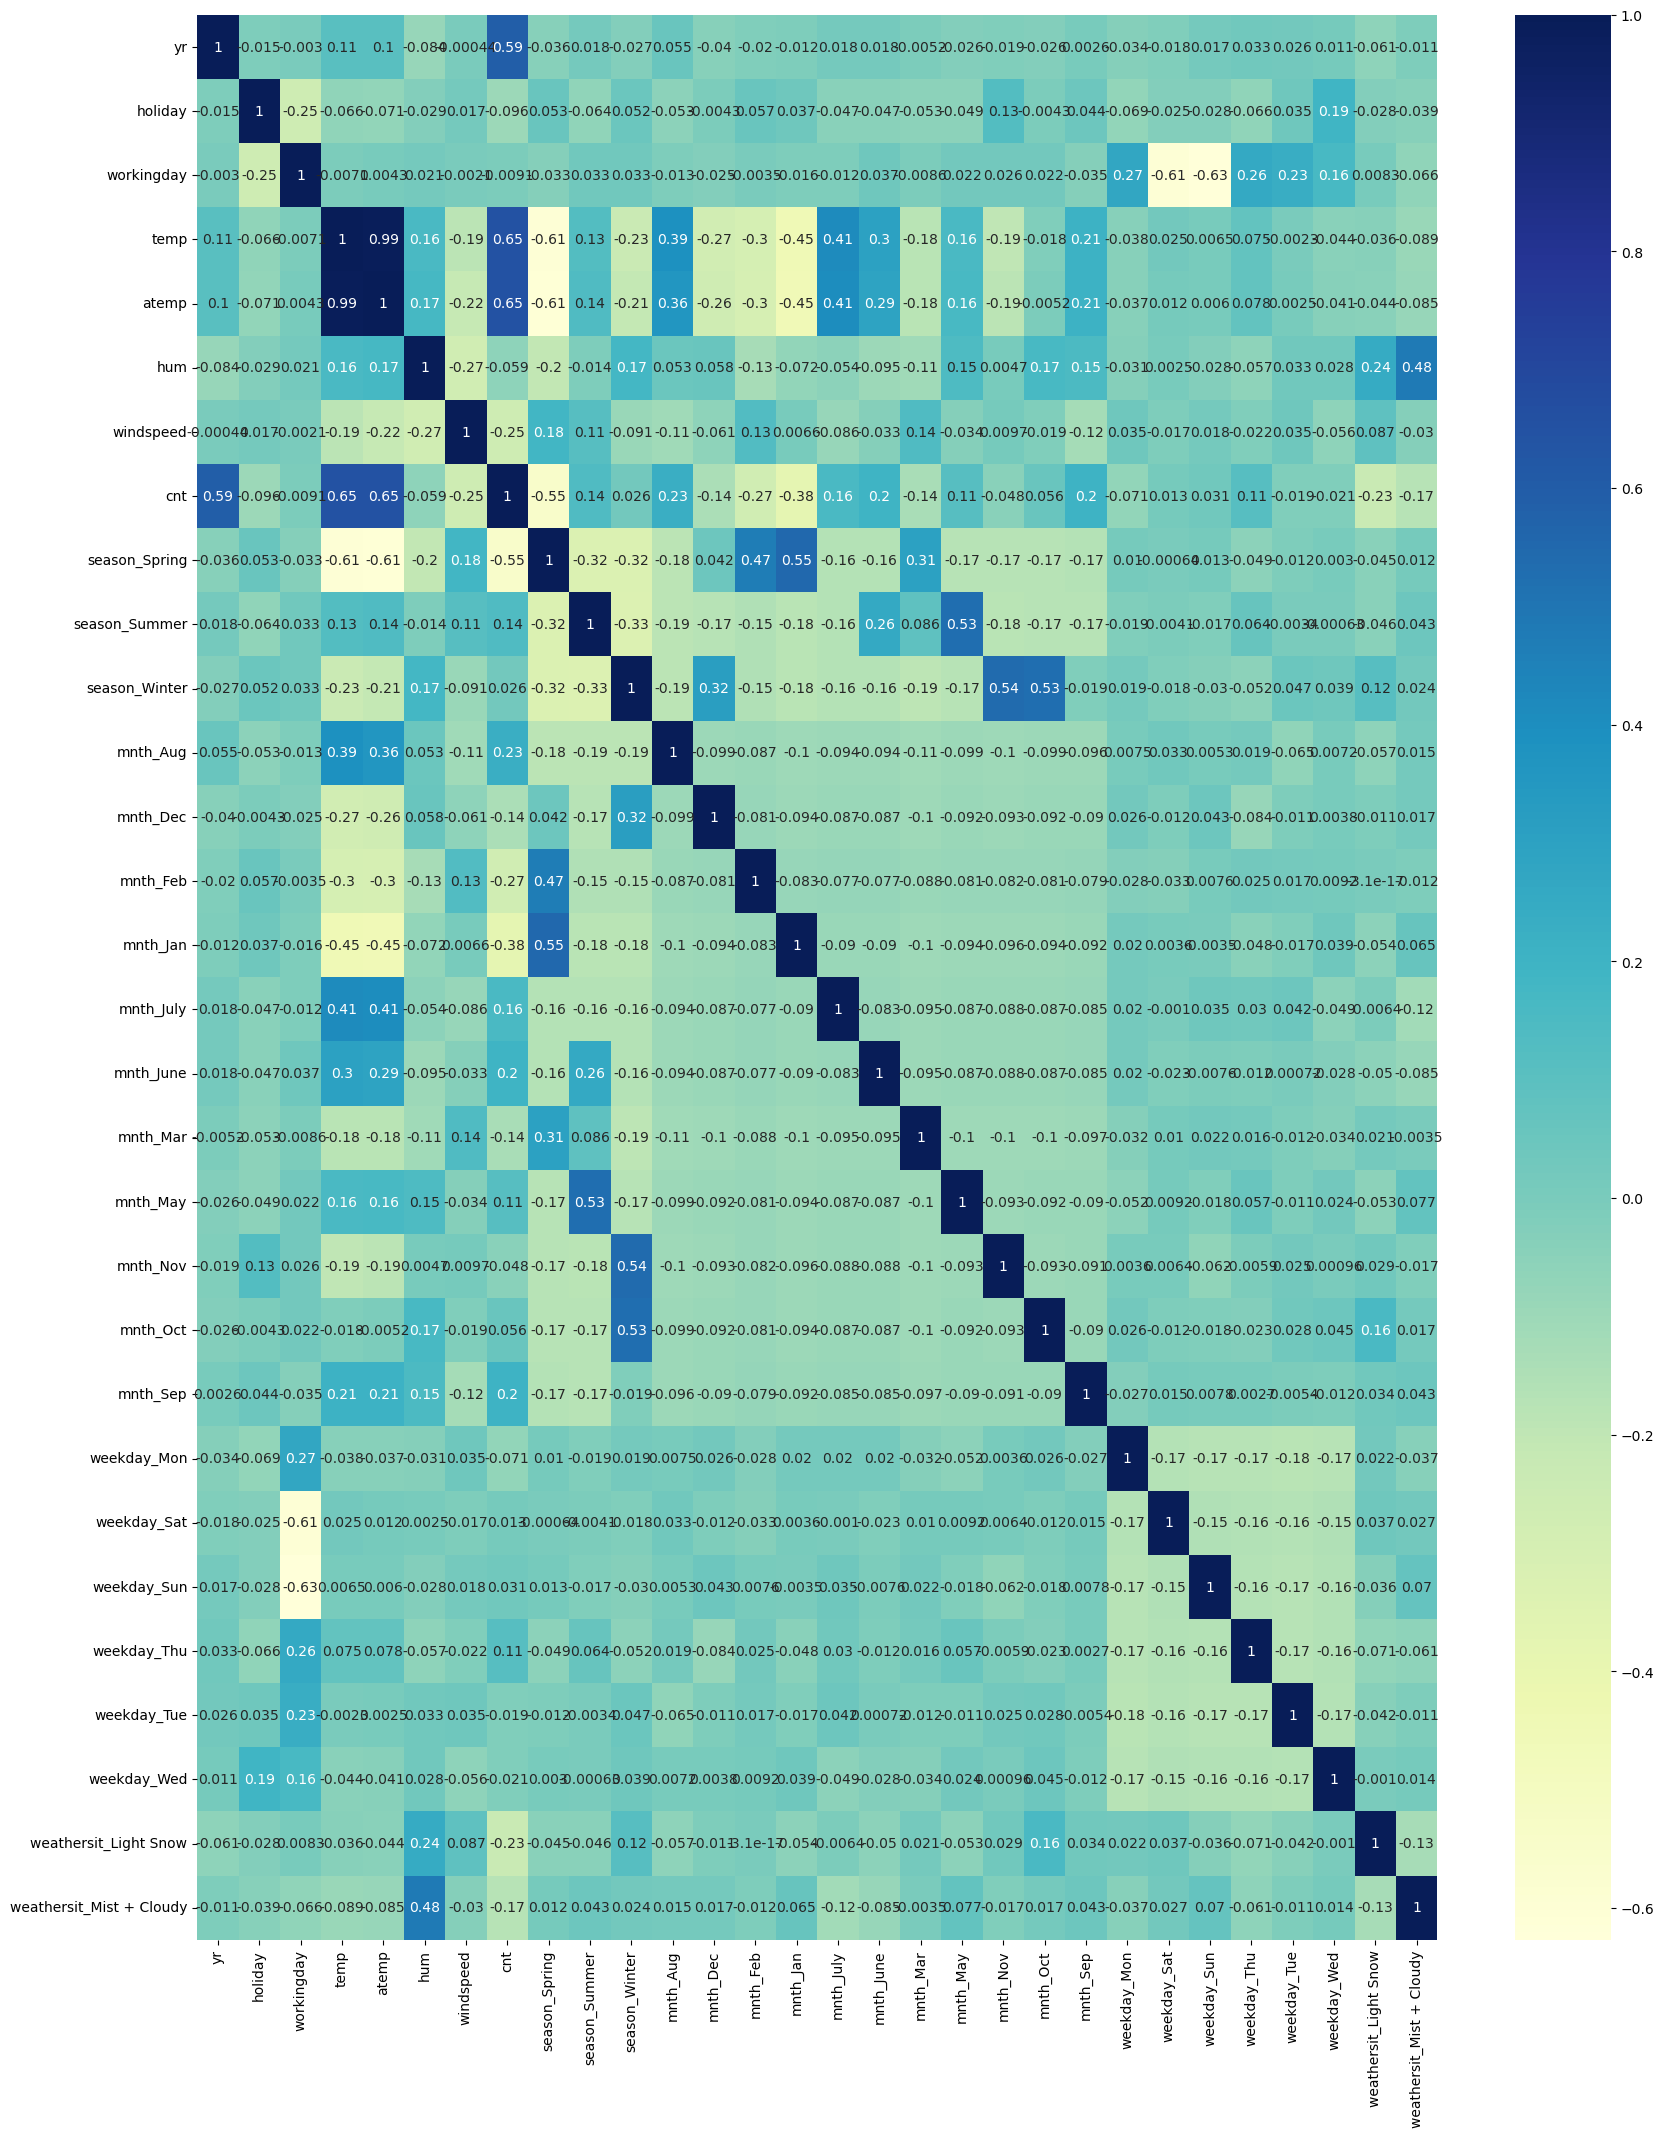

In [29]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Heatmap Output:
####  correlation with cnt and temp are high. checking a scatter for temp vs cnt.


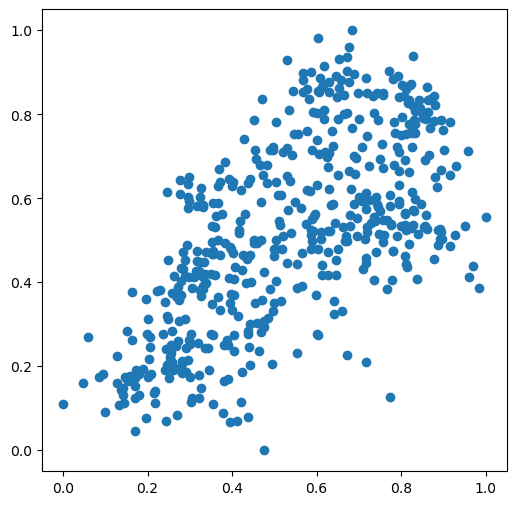

In [30]:
# Ploting the scatter plot temp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## Dividing into X and y sets for model building

In [31]:
# Data deviding into X and y sets for model building

y_train = df_train.pop('cnt')
X_train = df_train

## Step 4- Building the model
we will use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [32]:
# Create an instance of the LinearRegression model
lm = LinearRegression()

# Initialize RFE with the model and the number of features to select 15 feature
rfe = RFE(lm, n_features_to_select=15)

# Fiting RFE on the training dataset
rfe.fit(X_train, y_train)

# Selecting features mask
selected_features_mask = rfe.support_

# Selecting features indices
selected_features_indices = np.where(selected_features_mask)[0]

# Select the relevant features from the data
selected_X_train = X_train.iloc[:, selected_features_indices]


In [33]:
# Selected features mask
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [34]:
# checking 15 features

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [35]:
# Checking rest features
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()

In [39]:
#Checking summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        15:32:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### In Summary P Value looks all less then 0.05, Checking VIF

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,season_Spring,5.27
3,temp,4.42
8,season_Winter,3.83
7,season_Summer,2.77
4,hum,1.92
12,mnth_Nov,1.77
10,mnth_Jan,1.68
15,weathersit_Mist + Cloudy,1.57
9,mnth_Dec,1.50


### VIF looks for season_Spring is greater than 5 hence droping

In [41]:
X_train_new = X_train_rfe.drop(["season_Spring"], axis = 1)

In [42]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [43]:
# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

In [44]:
#Checking summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.50e-188
Time:                        15:32:10   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### P Value for Dec and Nov looks higer then the 0.05 hence from droping mnth_Nov

In [45]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,season_Winter,2.09
4,hum,1.90
11,mnth_Nov,1.71
9,mnth_Jan,1.67
14,weathersit_Mist + Cloudy,1.55
8,mnth_Dec,1.48
6,season_Summer,1.44
10,mnth_July,1.43


In [46]:
# Droping mnth_nov as P Value is high

X_train_new = X_train_new.drop(['mnth_Nov'], axis=1)

In [47]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [48]:
# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          7.91e-189
Time:                        15:32:10   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [50]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
9,mnth_Jan,1.63
7,season_Winter,1.55
13,weathersit_Mist + Cloudy,1.55
6,season_Summer,1.44
10,mnth_July,1.43
8,mnth_Dec,1.26
12,weathersit_Light Snow,1.25


In [51]:
# P Value for mnth_dec Looks high hence droping

X_train_new = X_train_new.drop(['mnth_Dec'], axis=1)

In [52]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [53]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [54]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.04e-189
Time:                        15:32:10   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Now P Values look all less then 0.05, Checking VIF

In [55]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
8,mnth_Jan,1.55
12,weathersit_Mist + Cloudy,1.55
7,season_Winter,1.53
9,mnth_July,1.43
6,season_Summer,1.41
11,weathersit_Light Snow,1.24
5,windspeed,1.19


### VIF is also lokking less then 5

## Step 5- Residual Analysis of the train Data

In [56]:
# Computing the predected value on y train
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')


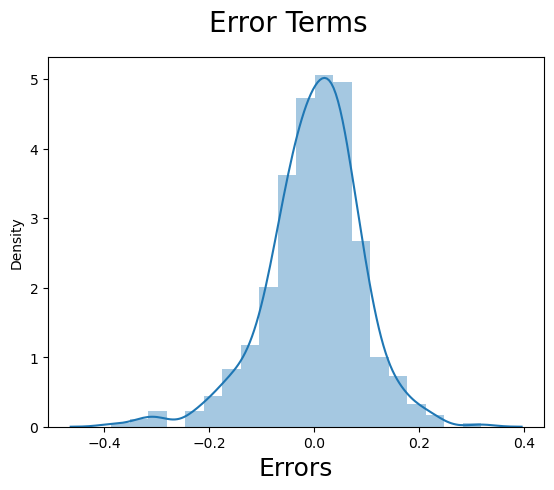

In [57]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
print(plt.xlabel('Errors', fontsize = 18))
plt.show()

### Mean of the residual is close to 0

## Step 6- Prediction and evaluation on the test set

In [58]:
# Applying scaling on the test dataset

num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
X_test = sm.add_constant(X_test)

In [61]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Making predictions
y_pred = lm.predict(X_test)

In [108]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)



In [110]:
# Getting r2 value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8034772805912216

### Absluted Diffrence between ytrain and ytest data

In [135]:
# checking residual diffrence from train and test data

print('y_test pred -> ',round(r2_score(y_test, y_pred),5))
print('y_test pred -> ',round(r2_score(y_train, y_train_cnt),5))
print('Absolute diffrence -> ',abs(round(r2_score(y_train, y_train_cnt)-r2_score(y_test, y_pred),5)))

y_test pred ->  0.80348
y_test pred ->  0.84112
Absolute diffrence ->  0.03764


## Model Evaluation

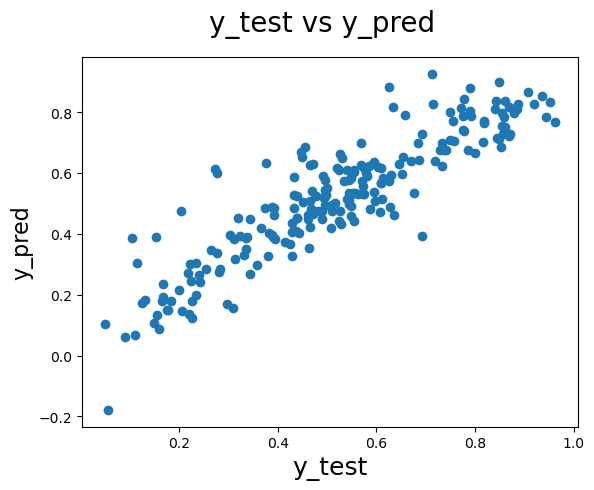

In [86]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [98]:
# Getting the Coefficient value for the final equation

param = pd.DataFrame(lm.params)
param.insert(0,'Features',param.index)
param.rename(columns = {0:'Coef value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coef value',ascending = False,inplace = True)
param

,Features,Coef value
index,,
3,temp,0.571530
0,const,0.244945
1,yr,0.228921
7,season_Winter,0.124753
10,mnth_Sep,0.094356
6,season_Summer,0.075636
8,mnth_Jan,-0.038226
9,mnth_July,-0.046810
12,weathersit_Mist + Cloudy,-0.050354


### The equation of our best fitted line is:
cnt= 0.2449 + (0.2289 x yr)- (0.098 x holiday) + (0.5715 x temp) - (0.1779 x hum) - (0.1948 x windspeed) + (0.0756 x season_Summer) + (0.1248 x season_Winter) - (0.0382 x mnth_Jan) + (0.0468 x mnth_July) + (0.0944 x mnth_Sep) - (0.2349 x weathersit_Light Snow) - (0.0504 x weathersit_Mist + Cloudy)

### Observation:
   1. Coeficient of temp, year, Sep, Summer, winter are posetive
   2. Coeficient of weathersit_light Snow, Cloudy, Jan, Jul, holiday, windspeed, humm are negative
   3. Costant is 0.2449
   4. Demand can be increase each year by 0.2289 * year
   5. Demand can be increase when the temp change by 0.5715 * temp
   6. Demand can be increase each summer season by 0.0756 * temp
   7. Demand can be increase during Jul to Oct as this month temp is normal company should mainly focus in these month
   8. Demand of bike can be reduce in light snow season so company should not increase demand in this season